## Antenna

Example product: https://docs.rs-online.com/d481/0900766b81673199.pdf or https://www.wifi-shop24.com/cyberbajt-yagi-directional-wifi-antenna-16dbi
 
- Gain 14dBi
- F/B ratio 28dB
- horizontal beam width 36 degrees
- vertical beam width 35 degrees
 (I assume these are FWHM)
 
 Or this datasheet I can extract the pattern from:
 https://www.rfsolutions.co.uk/downloads/627511f0d698a242ANT-24G-YAG16-2.pdf

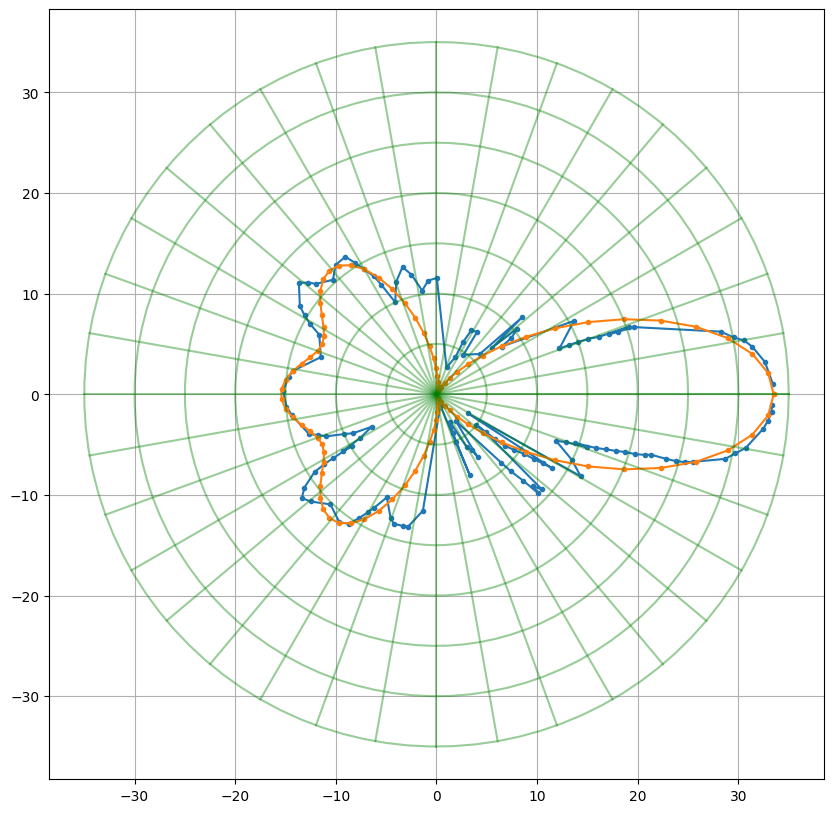

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from Model import Model
from Gain import getgain

plt.figure(figsize=[10,10])
df = pd.read_csv('yagi.csv',names=['db','angle'])
df = df[df['db']<=15]
df['db']*=13.5/15
df = df.sort_values('angle')
df['angle'] = np.deg2rad(df['angle'])

df.to_csv('gainlist.csv')

df['cos'] = np.cos(df['angle']-0.02)
df['sin'] = np.sin(df['angle']-0.02)
df['size'] = df['db']+20

#df['size'] = 10**(df['db']/10)
plt.plot(df['cos']*(df['size']),df['sin']*(df['size']),'.-')
ang = np.linspace(0,np.pi*2,100)
cx = np.cos(ang)
cy = np.sin(ang)
apr = getgain(ang)
size = apr+20
#size = 10**(apr/10)
plt.plot(cx*size,cy*size,'.-')

a = np.linspace(0,2*np.pi,100)
x,y = np.cos(a), np.sin(a)
for r in range(0,36,5):
    plt.plot(x*r,y*r,'-g',alpha=0.4)
for a in np.arange(0,np.deg2rad(360.1),np.deg2rad(10)):
    plt.plot([0,np.cos(a)*35],[0,np.sin(a)*35],'g-',alpha=0.4)
plt.axis('equal')
plt.grid()

#plt.plot(df['cos'],df['sin'],'.')

In [3]:
getgain(np.array([np.pi]))

array([-4.55135598])

In [3]:
10**(getgain(np.array([0.0]))/10)

array([22.3872116])

Moviepy - Building video vid5.mp4.
Moviepy - Writing video vid5.mp4



t:   4%|▎         | 23/625 [00:02<01:04,  9.39it/s, now=None]

KeyboardInterrupt: 

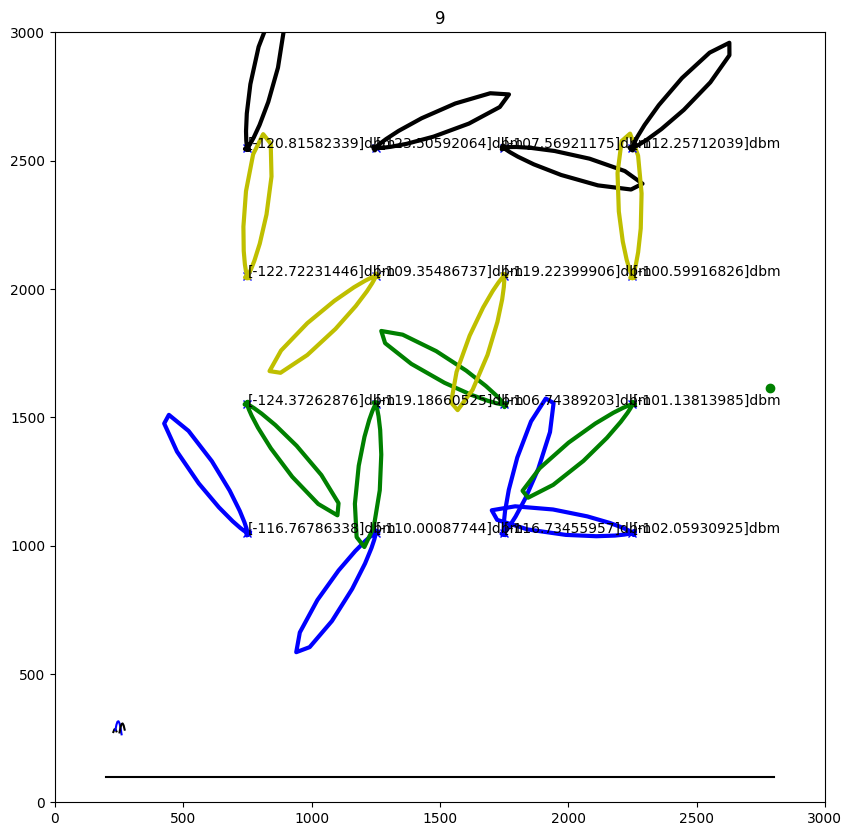

In [2]:
#pip install moviepy
#pip install ffmpeg --upgrade
m = Model('yagi',np.linspace(750,2250,4),np.linspace(1050,2550,4))
#m.transmitters = [m.transmitters[0],m.transmitters[3]]
m.makemovie('vid5.mp4')

Moviepy - Building video vid2.mp4.
Moviepy - Writing video vid2.mp4



Moviepy - Done !
Moviepy - video ready vid2.mp4


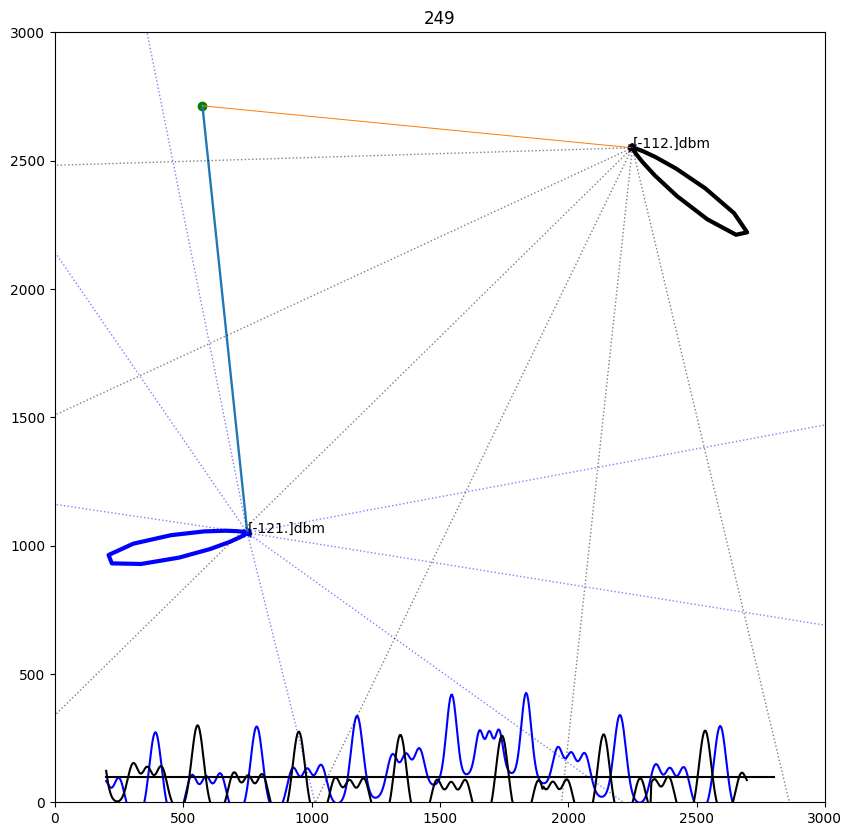

In [2]:
#pip install moviepy
#pip install ffmpeg --upgrade
m = Model('yagi',np.linspace(750,2250,2),np.linspace(1050,2550,2))
m.transmitters = [m.transmitters[0],m.transmitters[3]]
m.makemovie('vid2.mp4')

Moviepy - Building video vid4.mp4.
Moviepy - Writing video vid4.mp4



t:   5%|▍         | 30/625 [00:01<00:38, 15.32it/s, now=None]

KeyboardInterrupt: 

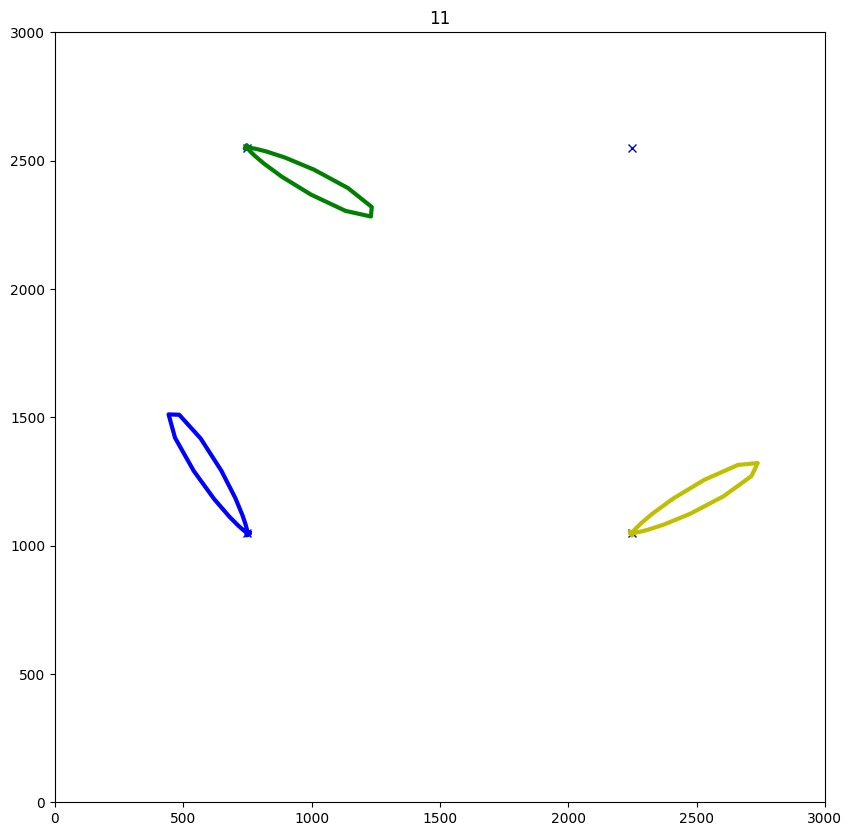

In [3]:
#pip install moviepy
#pip install ffmpeg --upgrade
m = Model('yagi',np.linspace(750,2250,2),np.linspace(1050,2550,2))
m.transmitters = [m.transmitters[0],m.transmitters[1],m.transmitters[2],m.transmitters[3]]
#m.transmitters = [m.transmitters[0]]
m.makemovie('vid4.mp4')